In [1]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

In [2]:
# 加载加州住房数据集
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


In [3]:
type(data)

sklearn.utils._bunch.Bunch

In [4]:
# 数据集拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [11]:
cb_model = cb.CatBoostRegressor(iterations=100, verbose=0)
cb_model.fit(X_train, y_train)

In [5]:
# CatBoost 特征重要性
acb_importance = cb_model.get_feature_importance(prettified=True)
explainer = shap.TreeExplainer(cb_model)

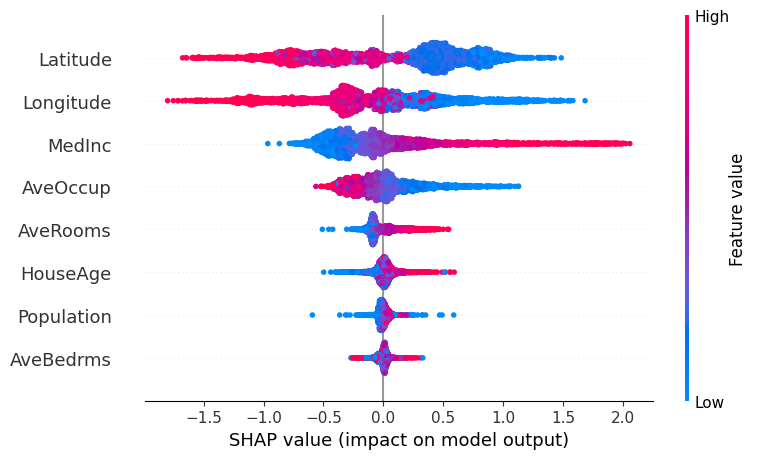

In [8]:
shap_values = explainer(X_test)

# 绘制 SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)

# 保存图形为图片文件
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

In [18]:
# 使用 RandomForest 代替 CatBoost
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [19]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# RandomForest 特征重要性
rf_importance = rf_model.feature_importances_
# 创建 SHAP Explainer
explainer = shap.TreeExplainer(rf_model)

In [28]:
shap_values = explainer(X_test) #very slowly in this line

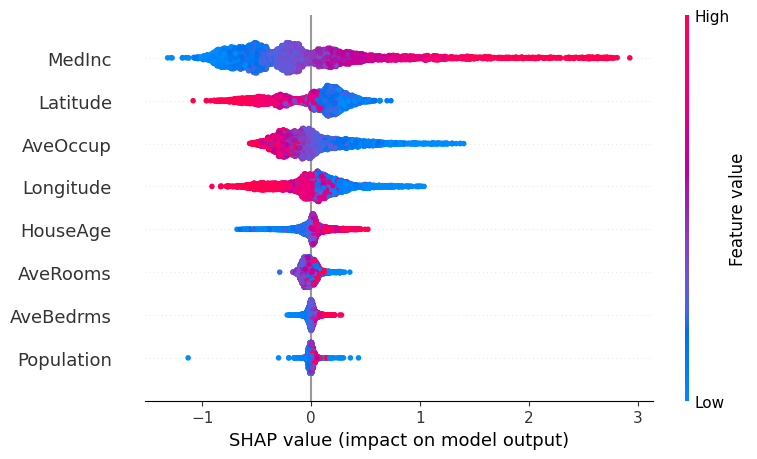

In [29]:
# 绘制 SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)

# 保存图形为图片文件
plt.savefig('shap_summary_plot_rf.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

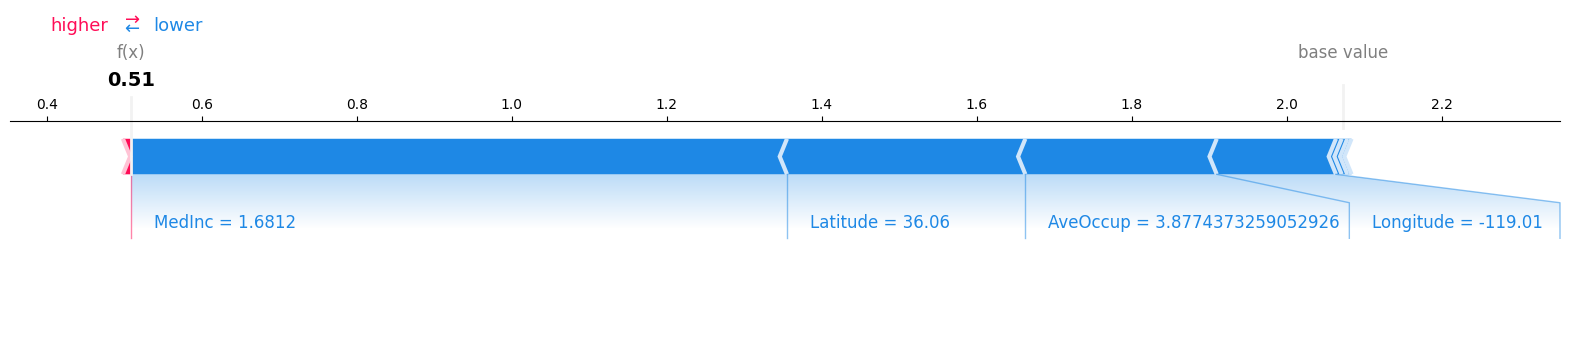

In [30]:
# # visualize the first prediction's explanation
# shap.plots.force(shap_values[0, ...])
# 创建 Force Plot

shap.force_plot(shap_values[0].base_values, shap_values[0].values, X_test.iloc[0], matplotlib=True, show=False)

# 保存图像到文件
#plt.savefig('shap_force_plot_colored.png', bbox_inches='tight')

# 关闭图形对象
#plt.close()